MLPClassifier example 

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

In [2]:
import pickle
df=pickle.load(open('/Users/zhiliwei/onedrive/科研总览/new_dissertation/my dessertation/1.intro/train_set_df.pickled','rb'))

In [3]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [4]:
df = df.drop(['Formation','Well Name','Depth'], axis=1)

In [5]:
df.head(50)

,Facies,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,74.58,0.647,13.5,13.300,3.4,1,0.915
5,3,73.97,0.636,14.0,13.385,3.6,1,0.894
6,3,73.72,0.630,15.6,13.930,3.7,1,0.872
7,3,75.65,0.625,16.5,13.920,3.5,1,0.830
8,3,73.79,0.624,16.2,13.980,3.4,1,0.809
9,3,76.89,0.615,16.9,14.220,3.5,1,0.787


In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [7]:
y = df['Facies']
x = df.drop(['Facies'], axis=1)

In [8]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x)
scaled_features = scaler.transform(x)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features,y, test_size= 0.2, random_state=27)

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(20,8,10), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [11]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 2.20474461
Iteration 2, loss = 2.17343206
Iteration 3, loss = 2.14059293
Iteration 4, loss = 2.11197840
Iteration 5, loss = 2.08681958
Iteration 6, loss = 2.06417789
Iteration 7, loss = 2.04377030
Iteration 8, loss = 2.02430504
Iteration 9, loss = 2.00553493
Iteration 10, loss = 1.98686421
Iteration 11, loss = 1.96818426
Iteration 12, loss = 1.94877406
Iteration 13, loss = 1.92873370
Iteration 14, loss = 1.90769235
Iteration 15, loss = 1.88563024
Iteration 16, loss = 1.86244320
Iteration 17, loss = 1.83789830
Iteration 18, loss = 1.81203289
Iteration 19, loss = 1.78544408
Iteration 20, loss = 1.75832357
Iteration 21, loss = 1.73116305
Iteration 22, loss = 1.70482545
Iteration 23, loss = 1.67863803
Iteration 24, loss = 1.65374456
Iteration 25, loss = 1.62954862
Iteration 26, loss = 1.60662255
Iteration 27, loss = 1.58495936
Iteration 28, loss = 1.56442753
Iteration 29, loss = 1.54538982
Iteration 30, loss = 1.52758426
Iteration 31, loss = 1.51145199
Iteration 32, los

Iteration 275, loss = 0.96952932
Iteration 276, loss = 0.96876595
Iteration 277, loss = 0.96815029
Iteration 278, loss = 0.96746703
Iteration 279, loss = 0.96693415
Iteration 280, loss = 0.96675230
Iteration 281, loss = 0.96574288
Iteration 282, loss = 0.96554632
Iteration 283, loss = 0.96458839
Iteration 284, loss = 0.96423380
Iteration 285, loss = 0.96359845
Iteration 286, loss = 0.96323188
Iteration 287, loss = 0.96276184
Iteration 288, loss = 0.96205885
Iteration 289, loss = 0.96129267
Iteration 290, loss = 0.96088369
Iteration 291, loss = 0.96025374
Iteration 292, loss = 0.95994478
Iteration 293, loss = 0.95965084
Iteration 294, loss = 0.95896838
Iteration 295, loss = 0.95852632
Iteration 296, loss = 0.95808079
Iteration 297, loss = 0.95783438
Iteration 298, loss = 0.95732813
Iteration 299, loss = 0.95697552
Iteration 300, loss = 0.95599160
Iteration 301, loss = 0.95562386
Iteration 302, loss = 0.95535579
Iteration 303, loss = 0.95456416
Iteration 304, loss = 0.95404720
Iteration 

In [12]:
accuracy_score(y_test, y_pred)

0.6296791443850267

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 27,  16,   2,   0,   0,   0,   0,   0,   0],
       [  9, 129,  38,   0,   0,   1,   1,   0,   0],
       [  3,  38,  94,   0,   0,   1,   1,   0,   0],
       [  1,   0,   0,  28,   0,  10,   1,   0,   0],
       [  0,   0,   1,   7,   2,  33,   3,  11,   0],
       [  0,   0,   0,   7,   1,  67,   3,  37,   2],
       [  0,   0,   0,   2,   0,   1,  11,   2,   0],
       [  0,   0,   1,   3,   0,  26,   1,  96,   3],
       [  0,   0,   0,   0,   0,   0,   1,  10,  17]])

In [14]:
# sns.heatmap(cm,annot=True, center=True,fmt='d')
# plt.ylabel('True label')
# plt.xlabel('Predicted label');
# plt.show()

In [15]:
test_set_df=pickle.load(open('/Users/zhiliwei/onedrive/科研总览/new_dissertation/my dessertation/1.intro/test_set_df.pickled','rb'))

In [16]:
df = test_set_df.drop(['Formation','Well Name','Depth'], axis=1)

In [17]:
y_test = df['Facies']
x_test = df.drop(['Facies'], axis=1)

In [18]:
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [19]:
y_pred = clf.predict(x_test_scaled)

In [20]:
accuracy_score(y_test, y_pred)

0.5776699029126213

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15, 11,  0,  0,  0,  0,  0,  0,  0],
       [10, 58, 25,  1,  0,  0,  0,  0,  0],
       [ 1, 25, 50,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  1, 19,  0,  6,  0,  1,  0],
       [ 0,  2,  0,  5,  1, 13,  1,  7,  0],
       [ 0,  0,  2,  6,  0, 33,  2, 15,  0],
       [ 0,  0,  0,  1,  0,  2,  8,  3,  0],
       [ 0,  0,  1,  3,  0, 14,  2, 45,  3],
       [ 0,  0,  0,  1,  0,  2,  0,  6,  9]])

In [22]:
y_pred.shape

(412,)

In [23]:
from sklearn.metrics import confusion_matrix
from classification_utilities import display_cm, display_adj_cm
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])

conf = confusion_matrix(y_test, y_pred)
display_cm(conf, facies_labels, display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    15    11                                              26
     CSiS    10    58    25     1                                  94
     FSiS     1    25    50     1           1                      78
     SiSh                 1    19           6           1          27
       MS           2           5     1    13     1     7          29
       WS                 2     6          33     2    15          58
        D                       1           2     8     3          14
       PS                 1     3          14     2    45     3    68
       BS                       1           2           6     9    18

Precision  0.58  0.60  0.63  0.51  1.00  0.46  0.62  0.58  0.75  0.61
   Recall  0.58  0.62  0.64  0.70  0.03  0.57  0.57  0.66  0.50  0.58
       F1  0.58  0.61  0.64  0.59  0.07  0.51  0.59  0.62  0.60  0.56


In [24]:
display_adj_cm(conf, facies_labels, adjacent_facies, 
           display_metrics=True, hide_zeros=True)

     Pred    SS  CSiS  FSiS  SiSh    MS    WS     D    PS    BS Total
     True
       SS    26                                                    26
     CSiS          93           1                                  94
     FSiS     1          75     1           1                      78
     SiSh                 1    19           6           1          27
       MS           2                19           1     7          29
       WS                 2     6          50                      58
        D                       1                13                14
       PS                 1     3                      64          68
       BS                       1           2                15    18

Precision  0.96  0.98  0.95  0.59  1.00  0.85  0.93  0.89  1.00  0.91
   Recall  1.00  0.99  0.96  0.70  0.66  0.86  0.93  0.94  0.83  0.91
       F1  0.98  0.98  0.96  0.64  0.79  0.85  0.93  0.91  0.91  0.91


In [25]:
temp=['1','2','3','4','5','6','7','8','9']

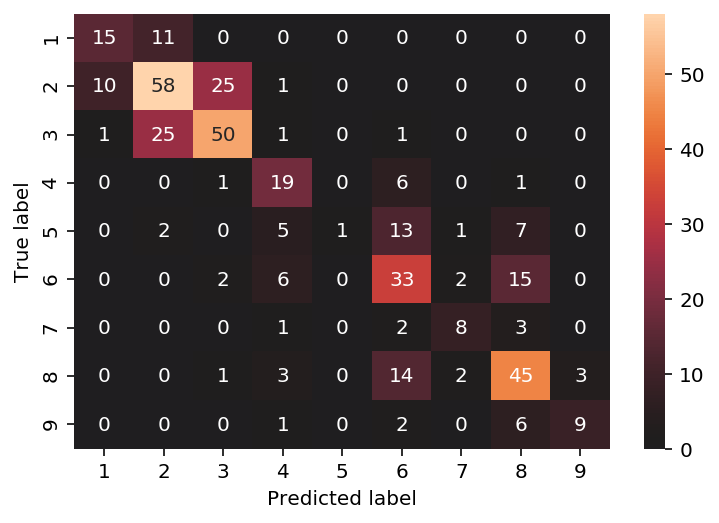

In [26]:
sns.heatmap(cm,annot=True, center=True,fmt='d',xticklabels=temp,yticklabels=temp)
plt.ylabel('True label')
plt.xlabel('Predicted label');
plt.show()